In [ ]:
!pip install face_recognition
!pip install jsonify

     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=cb0951155917b138fd0d760e746134e6af0f0679d02968bd94129478989fb862
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models
  Created wheel for jsonify: filename=jsonify-0.5-py3-none-any.whl size=1562 sha256=5c51611bfca76d6ed799d5f6cb7384a25a43b61bf58bfa57a45e65b67d90ca5e
  Stored in directory: /root/.cache/pip/wheels/a7/15/e0/a5eb19cf0496a9ea2bddb0c9f1dc324559385806b75400988b
Successfully built jsonify


In [ ]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime
from google.colab.patches import cv2_imshow
from flask import Flask,jsonify

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/Images"
images=[]
personName=[]
myList=os.listdir(path)
# myList.remove('.ipynb_checkpoints')
for cu_img in myList:
  current_img=cv2.imread(f'{path}/{cu_img}')
  images.append(current_img)
  personName.append(os.path.splitext(cu_img)[0])
print(personName)

['Shreyash', 'Tanvi Dogra', 'Suprabha KV']


All encodings complete
SUPRABHA KV


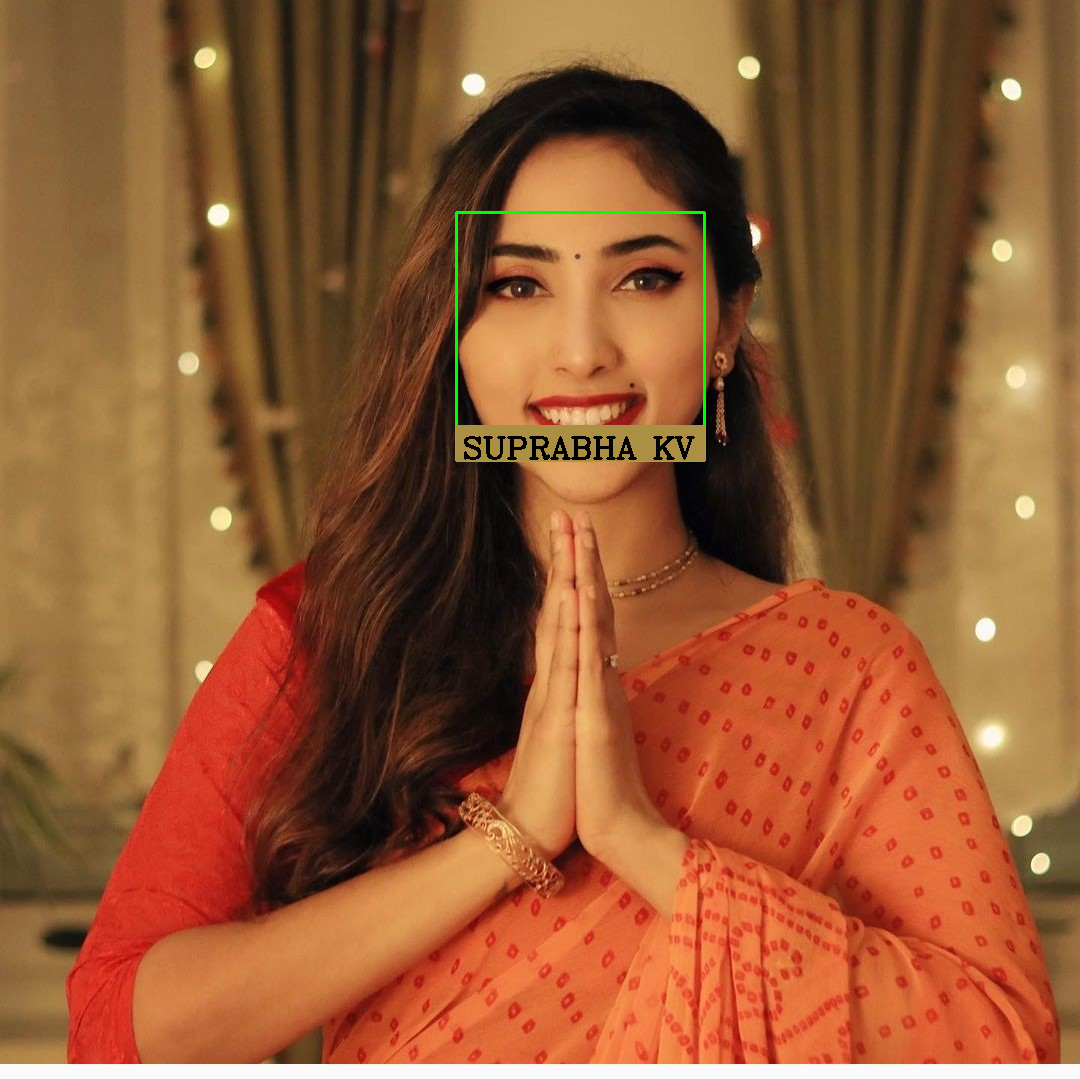

DONE


In [ ]:
def face_encodings(images):
  encodeList=[]
  for img in images:
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    encode=face_recognition.face_encodings(img)[0]
    encodeList.append(encode)
  return encodeList
encodeListKnown=(face_encodings(images))
print("All encodings complete")
try:
 while True:
  frame=cv2.imread("/content/drive/MyDrive/Colab Notebooks/Unknown/4.jpg",1)
  faces=cv2.resize(frame,(0,0),None,0.25,0.25)
  faces=cv2.cvtColor(faces,cv2.COLOR_BGR2RGB)
  facesCurrentFrame=face_recognition.face_locations(faces)
  encodesCurrentFrame=face_recognition.face_encodings(faces,facesCurrentFrame)

  for encodeFace,faceLoc in zip(encodesCurrentFrame,facesCurrentFrame):
    matches=face_recognition.compare_faces(encodeListKnown,encodeFace)
    faceDis=face_recognition.face_distance(encodeListKnown,encodeFace)
    matchIndex=np.argmin(faceDis)
    if matches[matchIndex]:
      name=personName[matchIndex].upper()
      print(name)
      y1,x2,y2,x1=faceLoc
      y1,x2,y2,x1=y1*4,x2*4,y2*4,x1*4
      cv2.rectangle(frame,(x1,y1),(x2,y2),(0,255,0),2)
      cv2.rectangle(frame,(x1,y2-35),(x2,y2),(67,143,171),cv2.FILLED)
      cv2.putText(frame,name,(x1+6,y2-2),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
  cv2_imshow(frame)
  if cv2.waitKey(10)==13:
      break
  cap.release()
  cv2.destroyAllWindows()
except Exception as e:
  print("DONE")

In [ ]:
app=Flask(__name__)
courses=[{"name":"Shreyash","rollNo":128},{"name":"Salman","rollNo":150},{"name":"SRK","rollNo":134},{"name":"Hrithik","rollNo":111},{"name":"Jay","rollNo":78}]
@app.route("/")
def index():
    return "Welcome To Jabalpur"
@app.route("/courses",methods=["GET"])
def get():
    return jsonify({"courses":courses})

@app.route("/courses",methods=["POST"])
def create():
    course=[{"name":"Romila","rollNo":123}]
    courses.append(course)
    return jsonify({"created":course})
@app.route("/delete/<int:index>",methods=["DELETE"])
def delete(index):
    courses.remove(courses[index])
    return jsonify({"result":True})
if __name__=="__main__":
    app.run(debug=True)